In [19]:
# Getting my basic libraries which I always use
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
# I will need to send a request to the Star Wars API
import requests

In [16]:
import missingno as msno 

- ### The base URL for the API is "https://swapi.dev/api/", so to get the planets the URL will be "https://swapi.dev/api/planets"

- ### **Note:** The API URL is currently not accessible for security reasons, so I will try using a proxy.

- ### From what I understand, the layout of the data is such that information regarding each planet is on a different page. 

- ### I want to make a function that loops through page after page to collect information on every planet 

In [ ]:
def every_planet():
    planets = []
    url = "https://swapi.py4e.com/api/planets/" 

    while url:
        response = requests.get(url)
        data = response.json()
        planets.extend(data['results'])
        url = data['next'] 

    return planets


In [4]:
planets_data = every_planet()

In [12]:
# Let's put this into a dataframe, which would pretty much be the starting point of our analysis 
df = pd.DataFrame(planets_data)

# Time to check out our data!
df

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.py4e.com/api/people/1/, https:/...","[https://swapi.py4e.com/api/films/1/, https://...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.py4e.com/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.py4e.com/api/people/5/, https:/...","[https://swapi.py4e.com/api/films/1/, https://...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.py4e.com/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.py4e.com/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.py4e.com/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.py4e.com/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.py4e.com/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.py4e.com/api/films/2/, https://...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.py4e.com/api/planets/5/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Muunilinst,28,412,13800,temperate,1,"plains, forests, hills, mountains",25,5000000000,[https://swapi.py4e.com/api/people/77/],[],2014-12-20T17:57:47.420000Z,2014-12-20T20:58:18.519000Z,https://swapi.py4e.com/api/planets/57/
57,Shili,unknown,unknown,unknown,temperate,1,"cities, savannahs, seas, plains",unknown,unknown,[https://swapi.py4e.com/api/people/78/],[],2014-12-20T18:43:14.049000Z,2014-12-20T20:58:18.521000Z,https://swapi.py4e.com/api/planets/58/
58,Kalee,23,378,13850,"arid, temperate, tropical",1,"rainforests, cliffs, canyons, seas",unknown,4000000000,[https://swapi.py4e.com/api/people/79/],[],2014-12-20T19:43:51.278000Z,2014-12-20T20:58:18.523000Z,https://swapi.py4e.com/api/planets/59/
59,Umbara,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,[https://swapi.py4e.com/api/people/82/],[],2014-12-20T20:18:36.256000Z,2014-12-20T20:58:18.525000Z,https://swapi.py4e.com/api/planets/60/


- ### Next up, there are some columns that are not really important to my analysis, so i will get rid of them using the **drop()** function

- ### Within this function I will make a **list** of the columns I want to get rid off

- ### For instance, the columns on dates on date created, date edited are simply information about the website, not the planets themselves 

- ### Information related to which films the planet appeared in is also not the most relevant, since this fdoes nto give us any inforamtion abotu the actual planets



In [13]:
df_planets = df.drop(columns = ["films", "created", "edited"])


In [14]:
df_planets

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.py4e.com/api/people/1/, https:/...",https://swapi.py4e.com/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.py4e.com/api/people/5/, https:/...",https://swapi.py4e.com/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],https://swapi.py4e.com/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],https://swapi.py4e.com/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],https://swapi.py4e.com/api/planets/5/
...,...,...,...,...,...,...,...,...,...,...,...
56,Muunilinst,28,412,13800,temperate,1,"plains, forests, hills, mountains",25,5000000000,[https://swapi.py4e.com/api/people/77/],https://swapi.py4e.com/api/planets/57/
57,Shili,unknown,unknown,unknown,temperate,1,"cities, savannahs, seas, plains",unknown,unknown,[https://swapi.py4e.com/api/people/78/],https://swapi.py4e.com/api/planets/58/
58,Kalee,23,378,13850,"arid, temperate, tropical",1,"rainforests, cliffs, canyons, seas",unknown,4000000000,[https://swapi.py4e.com/api/people/79/],https://swapi.py4e.com/api/planets/59/
59,Umbara,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,[https://swapi.py4e.com/api/people/82/],https://swapi.py4e.com/api/planets/60/


- ### So I have my updated dataframe called **df_planets** which contains pretty much all the information I could work with

- ### I now want to save this updated df to a csv file, just so I do not have to go through the entire process of requests everytime I want to work with this
 
- ### I use the **to_csv()** function for this. I also put **Index=False** to prevent the index column being added


In [ ]:
df_planets.to_csv("star_wars_planets.csv", index=False)

- ### I want to take a look at the surface water column. One of the things I noticed is that "unknown" is used when there is no value, but I want to convert this to a format that Python can understand 

- ### After this I will be able to use the **drop.na()** format, which will help me get rid of missing values while visualising the surface water on different planets

- ### My first visualisation will look at the distribution of plabets that have dofferent percentages of surface water 


In [17]:
df_planets["surface_water"] = pd.to_numeric(df_planets["surface_water"], errors="coerce")

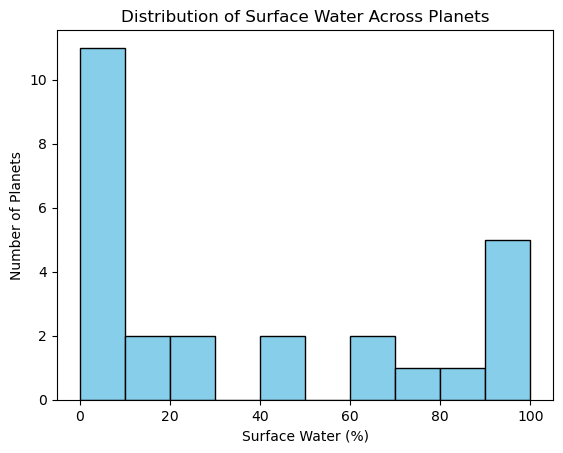

In [20]:
# Visualising distribution of surface water percentage using a histogram
plt.hist(df_planets["surface_water"].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Surface Water (%)")
plt.ylabel("Number of Planets")
plt.title("Distribution of Surface Water Across Planets")
plt.show()